In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
  num_words=10000
)

In [3]:
train_data.shape

(25000,)

In [4]:
#cada palabra esta representada por un numero
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
word_index = imdb.get_word_index()

In [7]:
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [8]:
word_index


{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [9]:
for _ in train_data[0]:
  # las primeras 3 palabras del word index son palabras reservadas
  print(word_index.get(_ - 3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [10]:
# debemos volver la lista del dataset de imdb
# a tensores para que la red los pueda entender
def vectorize(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

In [11]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [12]:
# son 25000 reviews en una estructura de 10000 que son las palabras
x_train.shape


(25000, 10000)

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
y_train[0]

1.0

Si no entendieron muy bien (😀👈🏼) para que se vectorizan las palabras dejo un video que explica de forma básica su funcionamiento:
[Youtube](https://www.youtube.com/watch?v=9IqWxJ1T57U&ab_channel=AMPTech)

## Entrenamiento del modelo de clasificación binaria

binary cross entropy

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
# para reducir a la probabilidad de 0 o 1 se usa sigmoid
model.add(layers.Dense(1, activation='sigmoid'))


In [19]:
# el rmsprop es una version optimizada del descenso del gradiente y es el optimizador por defecto
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')


In [20]:
# los primeros 10 mil valores son para validar y
# los demas 15 mil son para entrenar
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [21]:
# entrenar el modelo
history = model.fit(partial_x_train, partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 5s 116ms/step - loss: 0.5259 - accuracy: 0.7734 - val_loss: 0.3793 - val_accuracy: 0.8689
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.2947 - accuracy: 0.9040 - val_loss: 0.2918 - val_accuracy: 0.8898
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 0.2082 - accuracy: 0.9289 - val_loss: 0.3206 - val_accuracy: 0.8702
Epoch 4/4
30/30 [==============================] - 0s 10ms/step - loss: 0.1637 - accuracy: 0.9451 - val_loss: 0.2957 - val_accuracy: 0.8843


In [26]:
import matplotlib.pyplot as plt


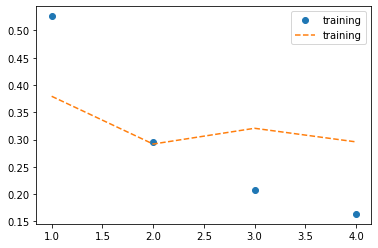

In [27]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label='training')
plt.plot(epoch, val_loss_values, '--', label='training')
plt.legend()
plt.show()


podemos ver en la grafica que el set de entremamiento mejoro muy rapido pero el set de validacion se estanco mucho antes, esto quiere decir que mi red tiene un Overfitting.

In [28]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3214 - accuracy: 0.8721


[0.32143139839172363, 0.8721200227737427]

In [25]:

history_dict


{'loss': [0.5259064435958862,
  0.294725239276886,
  0.20822761952877045,
  0.16373667120933533],
 'accuracy': [0.7734000086784363,
  0.9039999842643738,
  0.9288666844367981,
  0.9450666904449463],
 'val_loss': [0.37926551699638367,
  0.2917652428150177,
  0.3206368684768677,
  0.29571396112442017],
 'val_accuracy': [0.8689000010490417,
  0.8898000121116638,
  0.870199978351593,
  0.8842999935150146]}

## Regularización - Dropout

Overfitting es un problema que ocurre cuando el modelo se aprende de memoria los datos en lugar de aprender acerca del problema que se le presenta

Una red neuronal puede llegar a overfitting porque cada neurona se vuelve más especifica con los datos

Una de las formas más sencillas de reducir el overfitting es usando un modelo más pequeño.

Esto es si tenemos una red **demasiado compleja** con demasiados parámetros se apegará demasiado a estos datos haciendo **overfitting**

Y si tenemos una red **demasiado sencilla** llegaría a **underfitting** porque no lograría adaptarse al problema siendo tan pequeña

**no existe receta de cocina** para evitar el underfitting y el overfitting, ni para saber cuántas capas debería tener mi red ni cuantas neuronas debería tener cada capa, aun así, una técnica es empezar con un modelo muy pequeño y una vez cómo se comporta iterar

### Regularización

viene de un problema de hacer los datos más regulares

Occam's Razor "When faced with two equally good hypothesis, always choose the simpler one."

Reducir la complejidad del modelo, para hacer esto debemos reducir los pesos que arroja nuestra red al entrenar, la regularización se lograr con una fórmula matemática 

en la cual la regularización castiga la función de perdida utilizando el valor absoluto del peso o el peso al cuadrado multiplicado por un delta

https://compgenomr.github.io/book/logistic-regression-and-regularization.html

https://medium.com/analytics-vidhya/l1-vs-l2-regularization-which-is-better-d01068e6658c

http://laid.delanover.com/difference-between-l1-and-l2-regularization-implementation-and-visualization-in-tensorflow/


L1
$$
\text{cost} = \sum_{i=0}^N (y_i - \sum_{j=0}^M (x_{ij}W_j)^2 + \lambda \sum_{j=0}^M | W_j|)
$$

L2
$$
\text{cost} = \sum_{i=0}^N (y_i - \sum_{j=0}^M (x_{ij}W_j)^2 + \lambda \sum_{j=0}^M W_j^2)
$$

aquí siendo el valor decisivo lambda $\lambda$ que mientras mayor su valor mayor el efecto de la regularización sobre la función de perdida.

### Dropout

Otra técnica para reducir el overfitting es el Dropout

la universidad que planteo esto tuvo la idea haciendo fila en un banco y viendo que cada cierta cantidad de personas de la fila avanzaban los cajeros cambiaban de lugar internamente de forma aleatoria
Esto lo hacen para evitar que una persona que haga fila para ver un cajero reducir la posibilidad de atender alguien que conozca y que estén conspirando o tenga la intención de hacer algún fraude.

entonces pensaron que tal si mis redes neuronales están conspirando entre si con los valores de entrada, entonces qué tal si muevo mis valores de entrada para que la conspiración no sea tan alta

el dropout consiste durante cada una de las épocas apagar ciertas neuronas de forma aleatoria para reducir el exceso de exactitud que ocasiona el overfitting